## Метрики моделей классификации 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from sklearn.datasets import load_iris

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.neighbors import KNeighborsClassifier 

iris=load_iris()

In [2]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=7, test_size=0.2)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('classifier', KNeighborsClassifier())])

n_neighbors=[1, 2, 3, 4, 8, 12, 16, 20]
p=[1,2,3]
weights=['uniform','distance']

param_grid =[
    {'preprocessing': [MinMaxScaler(), StandardScaler(),RobustScaler(),Normalizer()], 
     'classifier': [KNeighborsClassifier()],
     'classifier__n_neighbors': n_neighbors,
     'classifier__p': p,
     'classifier__weights': weights
     }
]

grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, iid=True)
grid.fit(X_train,y_train)

print("----------------- Обучили и тестировали -------------------")
print("Индекс лучшего результата:\n{}".format(grid.best_index_))
print("------------------------------------")
print("Словарь с параметрами для лучшего решения:\n{}\n".format(grid.best_params_))
print("------------------------------------")
print("Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_))
print("------------------------------------")
print("Настройки лучшей модели в контейнере:\n{}\n".format(grid.best_estimator_))

----------------- Обучили и тестировали -------------------
Индекс лучшего результата:
51
------------------------------------
Словарь с параметрами для лучшего решения:
{'classifier': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='uniform'), 'classifier__n_neighbors': 3, 'classifier__p': 1, 'classifier__weights': 'uniform', 'preprocessing': Normalizer(copy=True, norm='l2')}

------------------------------------
Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: 0.983333

------------------------------------
Настройки лучшей модели в контейнере:
Pipeline(memory=None,
         steps=[('preprocessing', Normalizer(copy=True, norm='l2')),
                ('classifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
       

F:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [3]:
# Вывод всех результатов, а почему 51  не на первом месте?
gridresults = pd.DataFrame(grid.cv_results_)
display(gridresults.sort_values(["rank_test_score"]).T)

,95,51,67,79,87,99,103,123,127,59,...,30,166,10,46,178,154,162,182,190,186
mean_fit_time,0.000798893,0.000799322,0.000792933,0.000796175,0.000399446,0.000399399,0.000800371,0.00120165,0.000799036,0.000399423,...,0.00171182,0.00239687,0.00119808,0.00163498,0.000798917,0.00160067,0.00360136,0.00239971,0.00159385,0.00210817
std_fit_time,0.00159779,0.00159864,0.00158587,0.00159236,0.00119834,0.0011982,0.00160074,0.00183559,0.00159807,0.00119827,...,0.00189752,0.00195704,0.00183009,0.00200439,0.00159783,0.00196043,0.00120052,0.0019594,0.00195209,0.00190801
mean_score_time,0.00319574,0.00119941,0.000795102,0.00120275,0.000799346,0.00119839,0.00119524,0.00159824,0.00159256,0.000798965,...,0.00039947,0,0.00119572,0.000500321,0.000801706,0.000799227,0,0.00159502,0.000799155,0
std_score_time,0.00159787,0.00183214,0.00159021,0.00183734,0.00159869,0.00183057,0.00182576,0.00195744,0.0019505,0.00159793,...,0.00119841,0,0.0018265,0.00119674,0.00160342,0.00159845,0,0.00195351,0.00159831,0
param_classifier,"KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...",...,"KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si..."
param_classifier__n_neighbors,4,3,3,4,4,8,8,12,12,3,...,2,16,1,2,20,16,16,20,20,20
param_classifier__p,3,1,3,1,2,1,1,1,1,2,...,1,3,2,3,2,2,3,2,3,3
param_classifier__weights,distance,uniform,uniform,distance,distance,uniform,distance,uniform,distance,uniform,...,distance,distance,uniform,distance,uniform,uniform,uniform,distance,distance,uniform
param_preprocessing,"Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')",...,"RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ..."
params,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...

In [4]:
grid.cv_results_['params'][grid.best_index_]

{'classifier': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                      weights='uniform'),
 'classifier__n_neighbors': 3,
 'classifier__p': 1,
 'classifier__weights': 'uniform',
 'preprocessing': Normalizer(copy=True, norm='l2')}

In [5]:
grid.cv_results_['params'][143]

{'classifier': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                      weights='uniform'),
 'classifier__n_neighbors': 12,
 'classifier__p': 3,
 'classifier__weights': 'distance',
 'preprocessing': Normalizer(copy=True, norm='l2')}

In [6]:
from sklearn.pipeline import make_pipeline

preproc_1=grid.cv_results_['params'][143]['preprocessing']
model_1=grid.cv_results_['params'][143]['classifier']

pipe_1=make_pipeline(preproc_1, model_1)
display(pipe_1.score(X_train, y_train))
pipe_1

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# крайне полезная комбинация map и get 
preproc_2, model_2 = map(grid.cv_results_['params'][143].get, ['preprocessing','classifier'])

pipe_2=make_pipeline(preproc_2, model_2)
display(pipe_2.score(X_train, y_train))
pipe_2

In [ ]:
grid.best_estimator_

In [ ]:
pipe_1

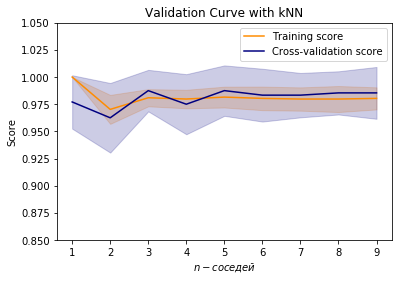

In [7]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedShuffleSplit

# затем заменим на pipe_1, почему не работает?
pipi_gs = grid.best_estimator_

n_range = range(1,10)
train_scores, test_scores = validation_curve(
    pipi_gs, X_train, y_train,
    param_name="classifier__n_neighbors", 
    param_range=n_range,
    cv=StratifiedShuffleSplit(n_splits=20,  test_size=0.2, train_size=0.7, random_state=42), 
    scoring="accuracy", 
    n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

test_sc=[]
for n in n_range:
    pipi_gs.set_params(classifier__n_neighbors = n)
    test_sc.append(pipi_gs.score(X_test , y_test))


plt.title("Validation Curve with kNN")
plt.xlabel("$n-соседей$")
plt.ylabel("Score")
plt.ylim(0.85, 1.05)

plt.plot(n_range, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(n_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(n_range, test_scores_mean, label="Cross-validation score",
             color="navy")
plt.fill_between(n_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy")
#plt.plot(n_range, test_sc, label="Test score", color="red", marker="s")
plt.legend(loc="best")
plt.show()

In [8]:
iris.target[iris.target!=0]=1

In [9]:
iris.target = 1 - iris.target

In [11]:
iris.target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=7, test_size=0.2)

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [20]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_scaler,y_train)
y_predict = model.predict(X_test_scaler)

In [19]:
model.score(X_test_scaler,y_test)

0.9666666666666667

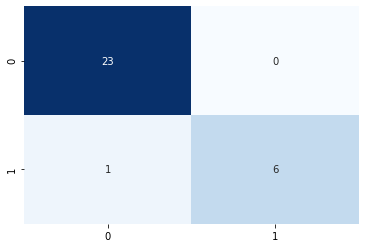

In [22]:
from sklearn.metrics import confusion_matrix

matrix_1=confusion_matrix(y_test,y_predict)

sns.heatmap(matrix_1,annot=True, fmt='g', cbar=None,cmap="Blues");

Text(0, 0.5, 'TPR (recall)')

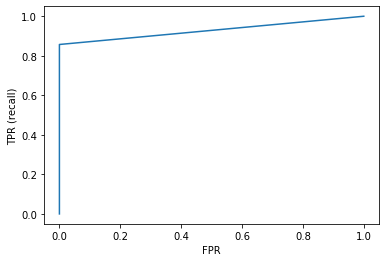

In [23]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_predict)

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")